In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


Text(0, 0.5, 'y')

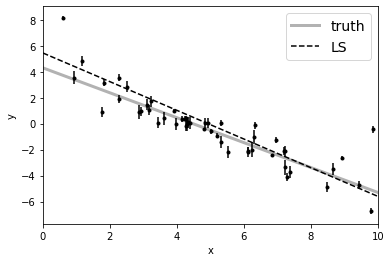

In [2]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

In [3]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


Text(0, 0.5, 'y')

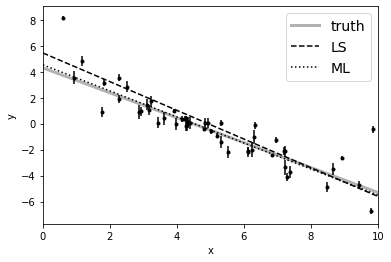

In [4]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

In [5]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

In [6]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [9]:
soln.x

array([-1.00300852,  4.5283143 , -0.79044034])

In [44]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(24, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos,5000, progress=True)

100%|██████████| 5000/5000 [00:07<00:00, 635.52it/s]


State([[-0.95029453  4.29561978 -0.69762102]
 [-1.0940767   4.84207564 -1.05942377]
 [-0.97472163  4.45942259 -0.52719462]
 [-1.12698568  4.98364708 -1.07646339]
 [-0.9307958   4.19092183 -0.8591767 ]
 [-0.90203643  4.05457518 -0.80531094]
 [-0.93972344  4.26647824 -0.59363894]
 [-1.10939537  5.00783339 -0.99913907]
 [-1.03383828  4.62460453 -0.77927891]
 [-1.04799106  4.76287697 -0.93622312]
 [-0.93403647  4.24534573 -0.9083387 ]
 [-1.1705828   5.24581814 -0.93722683]
 [-1.11960289  5.068593   -0.84158043]
 [-1.04278549  4.70101875 -0.78162288]
 [-0.89771387  4.05485955 -0.61312508]
 [-1.03885742  4.67696647 -0.74730246]
 [-1.09025577  4.83029622 -0.59170927]
 [-1.00735647  4.59849327 -0.49870603]
 [-1.12708772  5.00346984 -0.86278313]
 [-0.92377812  4.09882668 -0.67966097]
 [-0.83461038  3.78766265 -0.49082873]
 [-0.99340737  4.46505074 -0.73425178]
 [-1.06220371  4.79180354 -0.82448342]
 [-1.01497318  4.59173336 -0.87018974]], log_prob=[-12.44071621 -15.69266297 -14.24569203 -16.404

Text(0.5, 0, 'step number')

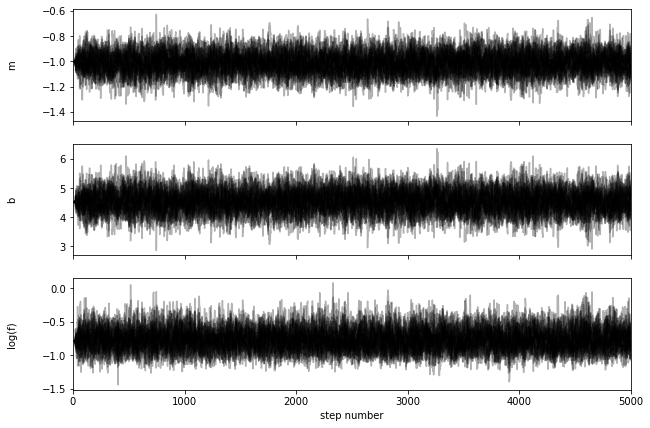

In [45]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [46]:
tau = sampler.get_autocorr_time()
print(tau)

[36.998929   36.89093361 36.41920746]


In [47]:
flat_samples = sampler.get_chain(discard=10, thin=15, flat=True)
print(flat_samples.shape)

(7968, 3)


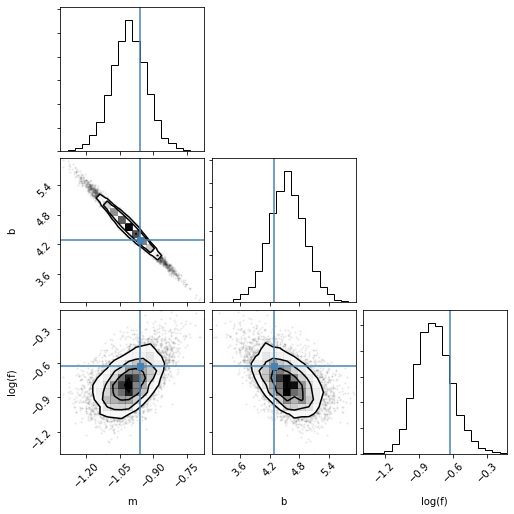

In [48]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
)

Text(0, 0.5, 'y')

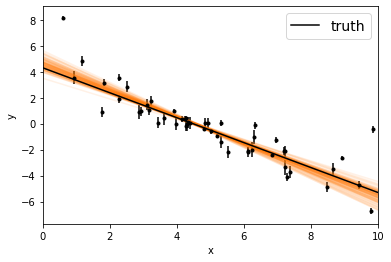

In [13]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

In [14]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [4]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [6]:
import emcee
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [7]:
log_prob(p0[0], means, cov)

-0.09996861215129807

In [8]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [9]:
sampler.run_mcmc(state, 10000)

State([[-1.05402987e+00  2.33324357e+00  1.20463010e+00  3.81574081e-01
   4.50114034e-01]
 [ 2.12988967e+00  9.61480015e-01  1.06992711e-01  4.76904568e-01
  -1.41200476e-01]
 [ 1.01520931e+00  1.63553410e+00  9.19900458e-01  4.73602295e-01
  -1.88936775e-01]
 [ 7.39148250e-01  2.10181901e+00  2.91548863e-01  6.20070454e-01
   2.65723643e-01]
 [ 4.95493847e-01  3.28681775e-01  3.87971702e-01  7.15624946e-01
  -2.29545601e-02]
 [-1.60138940e-01  1.51286426e+00  1.25396851e+00  2.96696148e-01
  -6.14242050e-02]
 [-2.71118106e-02  1.54463759e+00  8.58173528e-01  3.87550834e-01
   1.85937871e-01]
 [-4.43791218e-03  4.31093940e-01  9.13860204e-01  5.24577057e-01
  -8.03363078e-01]
 [-4.99775602e-01  5.61882431e-01  8.36692669e-01  7.49798430e-01
   6.19067541e-01]
 [ 1.19275066e+00  5.55074576e-01 -7.10339956e-02  9.87435349e-01
   3.16932733e-01]
 [-2.72921013e-01  1.51907922e+00  1.47654090e+00 -3.61581008e-02
  -6.45534836e-01]
 [-7.48895001e-02  2.60835063e+00  1.07465218e+00  5.452979

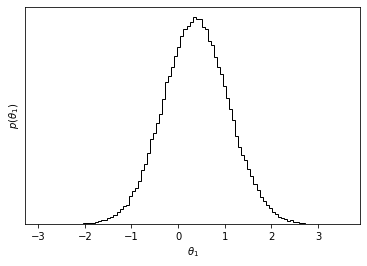

In [10]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);

In [13]:
samples.shape

(320000, 5)

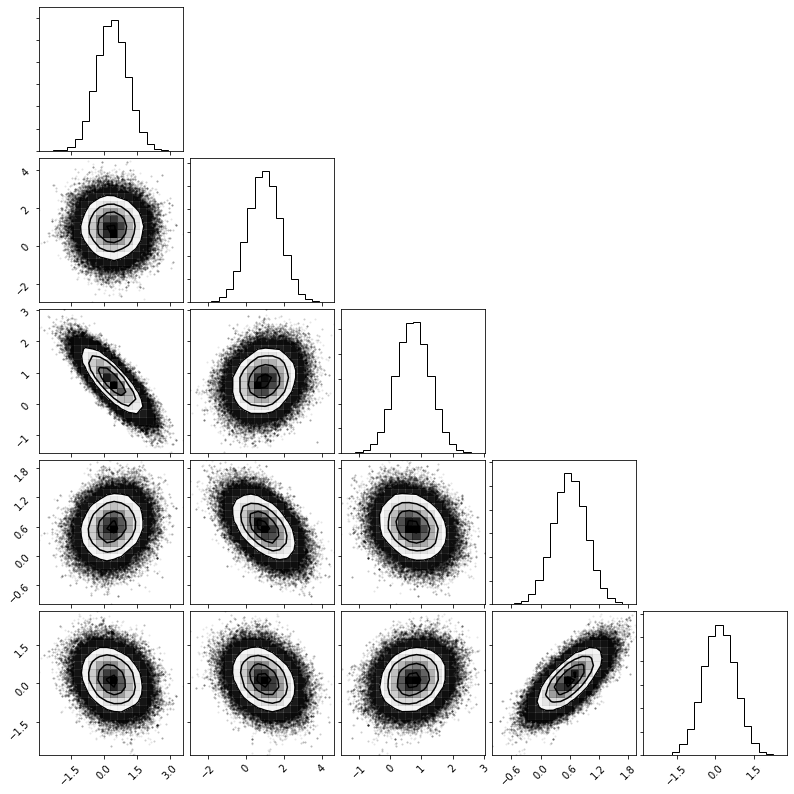

In [15]:
import corner
fig = corner.corner(
    samples
)